<a href="https://colab.research.google.com/github/avocadojj/marketing/blob/master/ML%20Models%20For%20Bank%20Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'snappy-lattice-393408' # Project ID inserted based on the query results selected to explore
location = 'asia-southeast2' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=snappy-lattice-393408:asia-southeast2:bquxjob_35fcf0a1_189a9c26bc9)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_35fcf0a1_189a9c26bc9') # Job ID inserted based on the query results selected to explore
print(job.query)

select * from snappy-lattice-393408.final_project.marketing


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_35fcf0a1_189a9c26bc9') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,client_id,age,job,marital,education,credit,housing,loan,contact,month,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subcribed,date
0,42,38,admin.,single,professional.course,no,no,no,telephone,5,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2022-05-01
1,53,53,admin.,single,professional.course,no,no,no,telephone,5,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2022-05-01
2,147,35,admin.,single,high.school,no,yes,no,telephone,5,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2022-05-01
3,173,42,admin.,single,university.degree,unknown,no,no,telephone,5,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2022-05-01
4,177,51,admin.,single,basic,no,no,no,telephone,5,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2022-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,8589944974,44,self-employed,divorced,professional.course,no,yes,no,cellular,6,...,999,0,nonexistent,-1.7,94.055,-39.8,0.742,4991.6,1,2022-06-04
41184,8589944976,44,self-employed,divorced,professional.course,no,yes,yes,cellular,6,...,999,1,failure,-1.7,94.055,-39.8,0.742,4991.6,0,2022-06-04
41185,8589945543,48,self-employed,divorced,university.degree,no,no,no,cellular,8,...,999,0,nonexistent,-1.7,94.027,-38.3,0.898,4991.6,1,2022-08-05
41186,8589945550,48,self-employed,divorced,university.degree,no,no,no,cellular,8,...,999,1,failure,-1.7,94.027,-38.3,0.898,4991.6,0,2022-08-05


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [4]:
results.describe()

,client_id,age,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subcribed
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.0
mean,2428627088.003375,40.02406,6.607896,2.979581,258.28501,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,3868307735.618883,10.42125,2.040998,1.411514,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.0,17.0,3.0,1.0,0.0,1.0,0.0,0.0,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.0
25%,10296.75,32.0,5.0,2.0,102.0,1.0,999.0,0.0,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.0
50%,20593.5,38.0,6.0,3.0,180.0,2.0,999.0,0.0,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.0
75%,8589935939.25,47.0,8.0,4.0,319.0,3.0,999.0,0.0,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.0
max,8589946236.0,98.0,12.0,5.0,4918.0,56.0,999.0,7.0,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.0


# **ML FOR BANK CAMPAIGN**

**1. CLASSIFICATION CUST USING GRADIENT BOOSTING**

In [14]:
import pandas as pd

# One-hot encoding for categorical variables
results = pd.get_dummies(results, columns=['job', 'marital', 'education', 'credit', 'housing', 'loan', 'contact', 'poutcome', 'day_of_week', 'month'])

# Displaying the first few rows of the encoded dataset
results.head()


,client_id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,42,38,160,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,0,0,0
1,53,53,179,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,0,0,0
2,147,35,338,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,0,0,0
3,173,42,192,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,0,0,0
4,177,51,303,2,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Features to be scaled
features_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

# Applying Min-Max scaling
scaler = MinMaxScaler()
results[features_to_scale] = scaler.fit_transform(results[features_to_scale])

# Displaying the first few rows of the scaled dataset
results.head()


,client_id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,42,0.259259,0.032534,0.000000,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0,0,1,0,0,0,0,0,0,0
1,53,0.444444,0.036397,0.000000,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0,0,1,0,0,0,0,0,0,0
2,147,0.222222,0.068727,0.000000,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0,0,1,0,0,0,0,0,0,0
3,173,0.308642,0.039040,0.000000,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0,0,1,0,0,0,0,0,0,0
4,177,0.419753,0.061610,0.018182,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0,0,1,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = results.drop(['client_id', 'subcribed', 'date'], axis=1)
y = results['subcribed']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((32950, 61), (8238, 61))

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Training the Random Forest Classifier
gb_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Here Accuracy of models:'+ str(accuracy))
print(classification_rep)

Here Accuracy of models:0.9197620781743141
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      7332
         1.0       0.67      0.53      0.59       906

    accuracy                           0.92      8238
   macro avg       0.81      0.75      0.77      8238
weighted avg       0.91      0.92      0.92      8238



In [9]:
# Extracting feature importances from the trained model
feature_importances = gb_classifier.feature_importances_

# Creating a DataFrame to display features and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame based on importance scores
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying the top 10 important features
top_features = features_df.head(10)
top_features

,Feature,Importance
1,duration,0.461046
9,nr_employed,0.304168
8,euribor3m,0.072256
3,pdays,0.038283
7,cons_conf_idx,0.037761
45,poutcome_success,0.013894
58,month_10,0.013064
6,cons_price_idx,0.010904
0,age,0.008801
51,month_3,0.004716


**2. FORECASTING using linreg for FORECASTING DURATION**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Defining features (X) and target (y) for forecasting
X_forecast = results.drop(['client_id', 'subcribed', 'date', 'duration'], axis=1)
y_forecast = results['duration']

# Splitting the data into training and testing sets for forecasting
X_train_forecast, X_test_forecast, y_train_forecast, y_test_forecast = train_test_split(X_forecast, y_forecast, test_size=0.2, random_state=42)

# Training the Linear Regression model for forecasting
lr_forecaster = LinearRegression()
lr_forecaster.fit(X_train_forecast, y_train_forecast)

# Predicting on the test set using Linear Regression
y_pred_forecast = lr_forecaster.predict(X_test_forecast)

# Evaluating the forecasting model using Mean Squared Error
mse = mean_squared_error(y_test_forecast, y_pred_forecast)
mse

coefficients = pd.DataFrame({'Feature': X_forecast.columns, 'Coefficient': lr_forecaster.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

                          Feature   Coefficient
39                       loan_yes  2.827395e+09
37                        loan_no  2.827395e+09
38                   loan_unknown  1.197723e+09
35                housing_unknown  1.189755e+09
47                  day_of_week_3  8.731465e+08
48                  day_of_week_4  8.731465e+08
46                  day_of_week_2  8.731465e+08
49                  day_of_week_5  8.731465e+08
45                  day_of_week_1  8.731465e+08
40               contact_cellular  5.045402e+08
41              contact_telephone  5.045402e+08
59                       month_12  4.728929e+08
51                        month_4  4.728929e+08
56                        month_9  4.728929e+08
52                        month_5  4.728929e+08
50                        month_3  4.728929e+08
54                        month_7  4.728929e+08
57                       month_10  4.728929e+08
55                        month_8  4.728929e+08
58                       month_11  4.728

*Feature Dependence*: The linear regression model tries to find out how each input feature affects the target. The bigger the coefficient (whether positive or negative), the more impact that feature has on the target. Features with small coefficients don't change the target much.

*Predicting Duration*: With this model, we can guess how long we'll talk to a client based on other information we have about them. This can help us plan better. For example, if we know a certain client usually talks for a long time, we can be ready for that.

*Resource Planning*: By knowing what factors make calls longer or shorter, the bank can use its resources better. This ensures that staff are available when longer calls are expected.

**3. FORECASTING using ARIMA for FORECASTING DURATION**

ADF Statistic: -6.125747
p-value: 0.000000
Forecast for the next 10 days:
2022-12-06    8.672483
2022-12-07    8.954138
2022-12-08    8.711923
2022-12-09    8.920221
2022-12-10    8.741090
2022-12-11    8.895138
2022-12-12    8.762661
2022-12-13    8.876587
2022-12-14    8.778614
2022-12-15    8.862868
Freq: D, Name: predicted_mean, dtype: float64


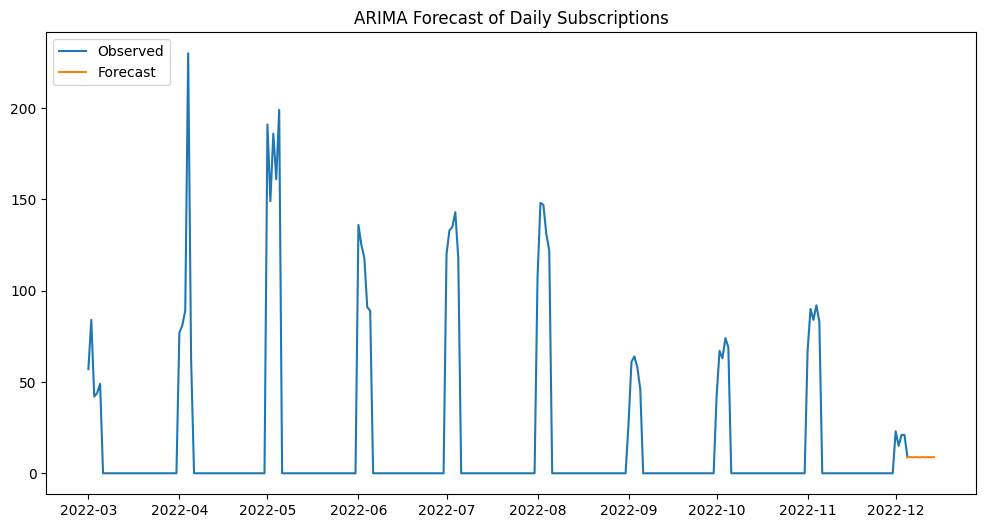

In [17]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

# Load the data
job = client.get_job('bquxjob_35fcf0a1_189a9c26bc9') # Job ID inserted based on the query results selected to explore
data = job.to_dataframe()
data['date'] = pd.to_datetime(data['date'])
# Convert 'subcribed' to binary
data['subcribed'] = data['subcribed'].astype(int)
data.set_index('date', inplace=True)

# Resample data on a daily basis, summing up the number of subscriptions for each day
data_daily = data['subcribed'].resample('D').sum()

# Check for stationarity
result = adfuller(data_daily)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If the series is not stationary, apply first order differencing
if result[1] > 0.05:
    print("The series is not stationary. Applying first order differencing...")
    data_daily_diff = data_daily.diff().dropna()
else:
    data_daily_diff = data_daily

# Fit the ARIMA model
model = ARIMA(data_daily_diff, order=(1,1,1))
try:
    model_fit = model.fit()
except Exception as e:
    print("Error fitting the ARIMA model:", e)
    model_fit = None

if model_fit is not None:
    # Perform out-of-sample forecast
    forecast_steps = 10  # forecast the next 10 days
    forecast = model_fit.get_forecast(steps=forecast_steps)

    # Print the forecast
    print("Forecast for the next 10 days:")
    print(forecast.predicted_mean)

    # Plot the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(data_daily.index, data_daily, label='Observed')
    plt.plot(pd.date_range(data_daily.index[-1], periods=forecast_steps, freq='D'), forecast.predicted_mean, label='Forecast')
    plt.title('ARIMA Forecast of Daily Subscriptions')
    plt.legend(loc='upper left')
    plt.show()


*Trends and Seasonality*: The ARIMA model captures trends and seasonality in the data. If there are patterns observed in the data (for example, more subscriptions during certain periods), this information can be useful for stakeholders to understand how the number of subscriptions has been changing over time.

*Forecast*: The ARIMA model provides a forecast for the number of subscriptions for the next 10 days. This can help stakeholders plan resources and marketing efforts accordingly. If the forecast predicts a surge in subscriptions, stakeholders might need to ensure that adequate resources are available to handle the increase. If the forecast predicts fewer subscriptions, stakeholders might want to ramp up marketing efforts or investigate potential causes.

*Stationarity*: The model checks the stationarity of the time series. A stationary time series is one whose properties do not depend on the time at which the series is observed, thus making the series easier to model. In our case, the p-value is less than 0.05, which indicates that the series is stationary. This is good news because it means the series can be easier to model.

*Uncertainty*: The ARIMA model provides a measure of uncertainty around the forecast, which is not shown here but can be extracted from the forecast object. This measure of uncertainty can help stakeholders understand the range of possible outcomes and assess risks.

*Data Transformation*: In our case, first-order differencing was applied to make the series stationary. This is a common technique used to stabilize the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

